In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df=pd.read_csv("weather_data (1).csv")
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
df["date"]=pd.to_datetime(df["date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [6]:
# Make this date column as index - Requirement of time series models
df.set_index("date", inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


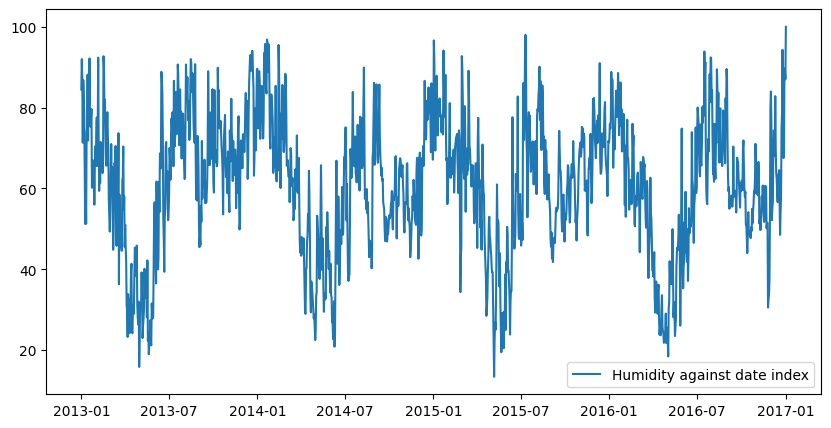

In [7]:
# Plot humidity against the date column to check the pattern
humidity = df["humidity"]

plt.figure(figsize=(10,5))
plt.plot(humidity , label="Humidity against date index")
plt.legend()
plt.show()

In [8]:
def adf_test(humidity):
  result = adfuller(humidity.dropna())
  print("P value is :" ,result[1])

  if result[1] <=0.05 :
    print("Data is Stationary")
  else:
    print("Data is Not Stationary")

humidity = df["humidity"]
adf_test(humidity)

P value is : 0.004470100478130688
Data is Stationary


**So we already have a Stationary data that means we can directly build ARIMA and SARIMAX models**

In [9]:
# Find optimal values of p,q for this arima model
'''
AIC = AKAIKE INFORMATION CRITERION
# AIC tells how good a model is   ( Lower AIC = Better model )
'''

'''
p= range(1,300)  # how many past values you want to use for making prediction  p=[1,2,3--------299]
d=[0]
q= range(1,300) # how many past errors you want to use for making prediction   d=[1,2,3,4-------------299]

import itertools
pdq=list(itertools.product(p,d,q))   #(1,0,20) , (5,0,34) , (3,0,56)

best_aic=float("inf")    # Right now i have taken aic to be infinite
best_pdq =None

for i in pdq:
  model=ARIMA( humidity , order=i )
  arima_result = model.fit()
  if arima_result.aic < best_aic:
    best_aic = arima_result.aic
    best_pdq = i

print("best arima order is :", best_pdq)
print("best AIC is :", best_aic)

'''

SyntaxError: invalid syntax (ipython-input-3388506321.py, line 11)

In [10]:
# ARIMA model

arima_model_1 = ARIMA( humidity , order=( 30  , 0 , 30 ))   #order=( p , d , q)
arima_result = arima_model_1.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


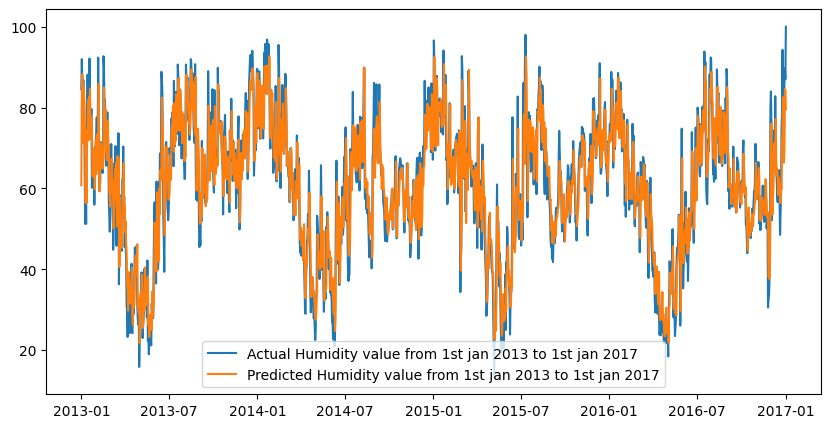

In [11]:
# So we have from 1st jan 2013  to   1st jan 2017
arima_pred = arima_result.predict( start=0 , end=len(humidity)-1 )

plt.figure(figsize=(10,5))
plt.plot( humidity , label="Actual Humidity value from 1st jan 2013 to 1st jan 2017")
plt.plot( arima_pred , label="Predicted Humidity value from 1st jan 2013 to 1st jan 2017")
plt.legend()
plt.show()

**Now lets ask the arima model to make the forecasting for next 100 days**

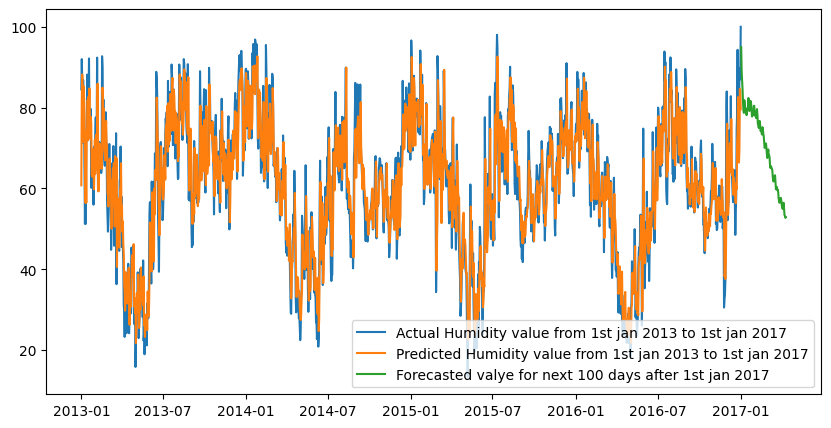

In [14]:
arima_forecast = arima_result.forecast(steps=100)

plt.figure(figsize=(10,5))
plt.plot( humidity , label="Actual Humidity value from 1st jan 2013 to 1st jan 2017")
plt.plot( arima_pred , label="Predicted Humidity value from 1st jan 2013 to 1st jan 2017")
plt.plot(arima_forecast , label="Forecasted valye for next 100 days after 1st jan 2017")
plt.legend()
plt.show()

In [ ]:
sarimax_model = SARIMAX( humidity , order=( 30,0,30 )  , seasonal_order= (30,0,30,365))   #order=( p , d , q , yearly_seasonality)
sarimax_result = sarimax_model.fit()

# So we have from 1st jan 2013  to   1st jan 2017
sarimax_pred = sarimax_result.predict( start=0 , end=len(humidity)-1 )

plt.figure(figsize=(10,5))
plt.plot( humidity , label="Actual Humidity value from 1st jan 2013 to 1st jan 2017")
plt.plot( sarimax_pred , label="Predicted Humidity value from 1st jan 2013 to 1st jan 2017")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
